<h2>Categorical Variables and One Hot Encoding</h2>

Categorical Variables contain values that are names, labels or strings. At first glance, these variables seem harmless. However, they can cause difficulties in your machine learning models as they do not know how to assign some numerical importance to them. Why? Because Machine Learning Models want everything to be provided to them in numerical form.

**“Machine Learning Models want everything to be provided to them in numerical form.”**

So, the question now is, how do you extract the meaningful information that these categorical variables hold? See example below:

Here, we have a sample data for a project where we are looking to predict the price per night of an Airbnb listing. Looking at the data and the problem we are solving, we can easily say that this is a supervised problem.

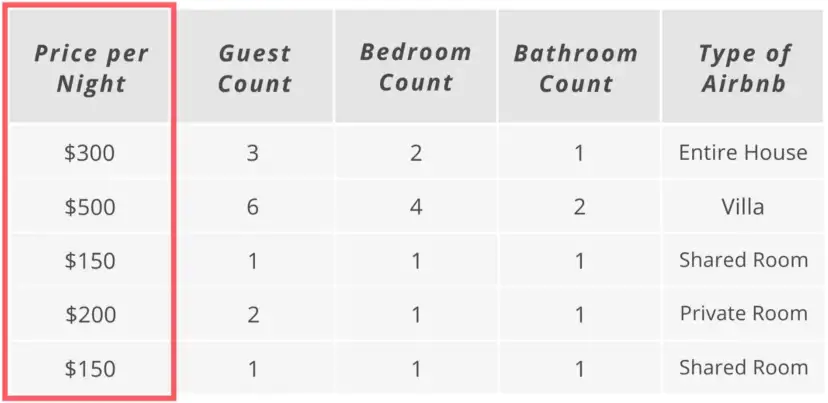

As this is a supervised problem, we have a column for the prices (target variable) and input variables that we will be putting into our model as we believe that they have some sort of relationship with the price per night variable. However, the Type of Airbnb variable is categorical. It is providing a label for each type of Airbnb listing. 

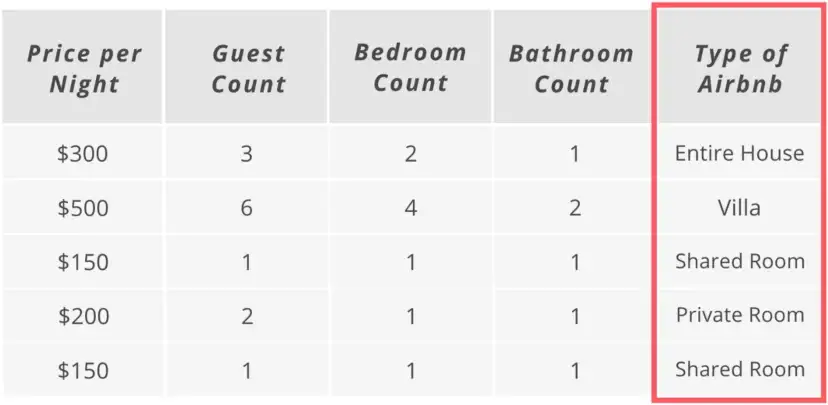

We can’t possibly understand the numerical differences between classes like these as they do not have any order or scale. But in a glance, the type of Airbnb seems something that could be really useful in predicting the price per night so we don’t want to drop it. So, we will go back to our question earlier — how do you deal with categorical variables like these? A possible solution would be to convert each class in numerical form.

**Label Encoding**

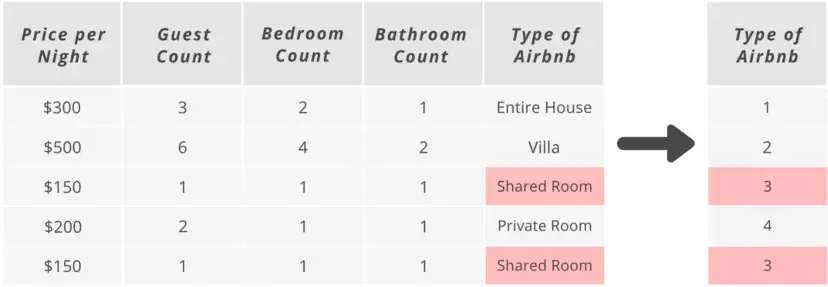

As you can see, the Entire House is assigned as 1, Villa as 2, Shared Room as 3, and Private Room as 4. This approach will actually work and the model will take this new variable without any problem at all. However, this may not be the best approach or transformation for this variable. Why? Because we have assigned an order form and scaled to the data where we don’t actually know if an order or scale exist. Here, we are telling the model that Shared Rooms are three times better than the entire house or a villa type of listing and will result in the model finding a false relationship or no relationship between this transformed variable (type of airbnb in numerical form) and our output variable (price per night).

Again with the question, “How do you deal with categorical variables like these?” The solution? Create new variables that are often called dummy variables. And to do this, we will use the process that is called One-Hot Encoding.

**“One-Hot Encoding is a representation of categorical variables as binary vectors.”**

Now, let’s transform our categorical variable Type of Airbnb using the one-hot encoding approach or represent the classes as binary vectors. 

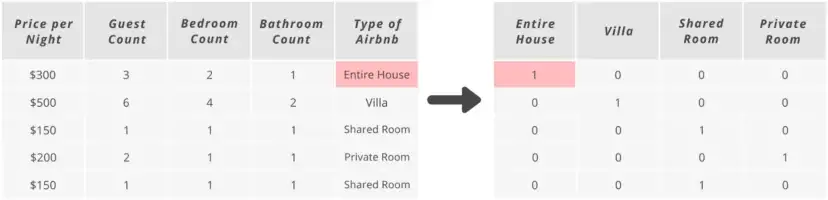

### The Dummy Variable Trap

To avoid this, perform the below operation.

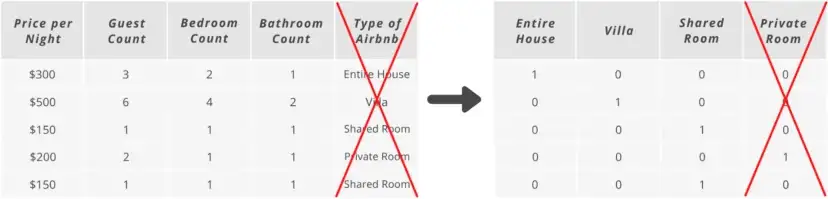

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("homeprices.csv")
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


<h2 style='color:purple'>Using pandas to create dummy variables</h2>

In [3]:
dummies = pd.get_dummies(df.town)
dummies

,monroe township,robinsville,west windsor
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
5,False,False,True
6,False,False,True
7,False,False,True
8,False,False,True
9,False,True,False


In [4]:
merged = pd.concat([df,dummies],axis='columns')
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,True,False,False
1,monroe township,3000,565000,True,False,False
2,monroe township,3200,610000,True,False,False
3,monroe township,3600,680000,True,False,False
4,monroe township,4000,725000,True,False,False
5,west windsor,2600,585000,False,False,True
6,west windsor,2800,615000,False,False,True
7,west windsor,3300,650000,False,False,True
8,west windsor,3600,710000,False,False,True
9,robinsville,2600,575000,False,True,False


In [5]:
final = merged.drop(['town'], axis='columns')
final

,area,price,monroe township,robinsville,west windsor
0,2600,550000,True,False,False
1,3000,565000,True,False,False
2,3200,610000,True,False,False
3,3600,680000,True,False,False
4,4000,725000,True,False,False
5,2600,585000,False,False,True
6,2800,615000,False,False,True
7,3300,650000,False,False,True
8,3600,710000,False,False,True
9,2600,575000,False,True,False


<h3 style='color:purple'>Dummy Variable Trap</h3>

When you can derive one variable from other variables, they are known to be multi-colinear. Here
if you know values of california and georgia then you can easily infer value of new jersey state, i.e. 
california=0 and georgia=0. There for these state variables are called to be multi-colinear. In this
situation linear regression won't work as expected. Hence you need to drop one column. 

**NOTE: sklearn library takes care of dummy variable trap hence even if you don't drop one of the 
    state columns it is going to work, however we should make a habit of taking care of dummy variable
    trap ourselves just in case library that you are using is not handling this for you**

In [6]:
final = final.drop(['west windsor'], axis='columns')
final

,area,price,monroe township,robinsville
0,2600,550000,True,False
1,3000,565000,True,False
2,3200,610000,True,False
3,3600,680000,True,False
4,4000,725000,True,False
5,2600,585000,False,False
6,2800,615000,False,False
7,3300,650000,False,False
8,3600,710000,False,False
9,2600,575000,False,True


In [7]:
X = final.drop('price', axis='columns')
X

,area,monroe township,robinsville
0,2600,True,False
1,3000,True,False
2,3200,True,False
3,3600,True,False
4,4000,True,False
5,2600,False,False
6,2800,False,False
7,3300,False,False
8,3600,False,False
9,2600,False,True


In [8]:
y = final.price

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [10]:
model.fit(X,y)

LinearRegression()

In [11]:
model.predict(X) # 2600 sqr ft home in new jersey

array([539709.7398409 , 590468.71640508, 615848.20468716, 666607.18125134,
       717366.15781551, 579723.71533005, 605103.20361213, 668551.92431735,
       706621.15674048, 565396.15136531, 603465.38378844, 628844.87207052,
       692293.59277574])

In [12]:
model.score(X,y)

0.9573929037221873

In [13]:
model.predict([[3400,0,0]]) # 3400 sqr ft home in west windsor

C:\Users\AbdulAziz\anaconda3\envs\env_face\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([681241.66845839])

In [14]:
model.predict([[2800,0,1]]) # 2800 sqr ft home in robbinsville

C:\Users\AbdulAziz\anaconda3\envs\env_face\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

<center><h1> Happy Learning